# Assignment 3 – Submission for Feedback – JUS5080 Autumn 2024

In [1]:
import json

def read_json_file(filename):
    'Read json data from a file'
    with open(filename, 'r') as file:
        text_data = file.read()
        json_data = json.loads(text_data)
        return json_data

In [2]:
def json_to_text(doc, include_headings=True):
    '''
    Extract content text from JSON tree structure.
    https://echr-opendata.eu/doc/

    Params:
        doc: ECHR JSON element
        include_headings: Whether to include the section headings
    '''
    def json_to_text_helper(doc):
        result = []
        if not doc['elements'] or include_headings:
            result.append(doc['content'].strip().replace('\xa0', ' '))  # replace non-breaking space
        for element in doc['elements']:
            result.extend(json_to_text_helper(element))
        return result
    return '\n'.join(json_to_text_helper(doc))


def get_facts(case):
    'Get the "Facts" section of the case text'
    content = case['content']
    docname = list(content)[0]
    document = content[docname]

    for section in document:
        if section.get('section_name') == 'facts':
            return json_to_text(section)
    return ''


def get_conclusion(case, article):
    '''
    Get the conclusion of the case regarding the specified article
    '''
    conclusions = case['conclusion']
    for conclusion in conclusions:
        if conclusion.get('article', '').startswith(article):
            return conclusion['type']
    return 'no conclusion'

In [3]:
# 3.1
# Loads cases-1000.json and extracts the facts from each case with the function get_facts()
cases = read_json_file('/src/data/JUS5080/cases-1000.json')
facts = []
for case in cases:
    fact = get_facts(case)
    facts.append(fact)
del cases

In [4]:
# 3.2
# Makes a model based on facts, prints the number of topics found, and prints the number of documents in each topic. 
from top2vec import Top2Vec
model = Top2Vec(facts, min_count=10, speed='fast-learn')
print(model.get_num_topics())
print(model.get_topic_sizes())

2024-11-15 13:31:06,968 - top2vec - INFO - Pre-processing documents for training
2024-11-15 13:31:11,683 - top2vec - INFO - Creating joint document/word embedding
2024-11-15 13:33:56,144 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-15 13:34:04,227 - top2vec - INFO - Finding dense areas of documents
2024-11-15 13:34:04,252 - top2vec - INFO - Finding topics


2
(array([978,  22]), array([0, 1]))


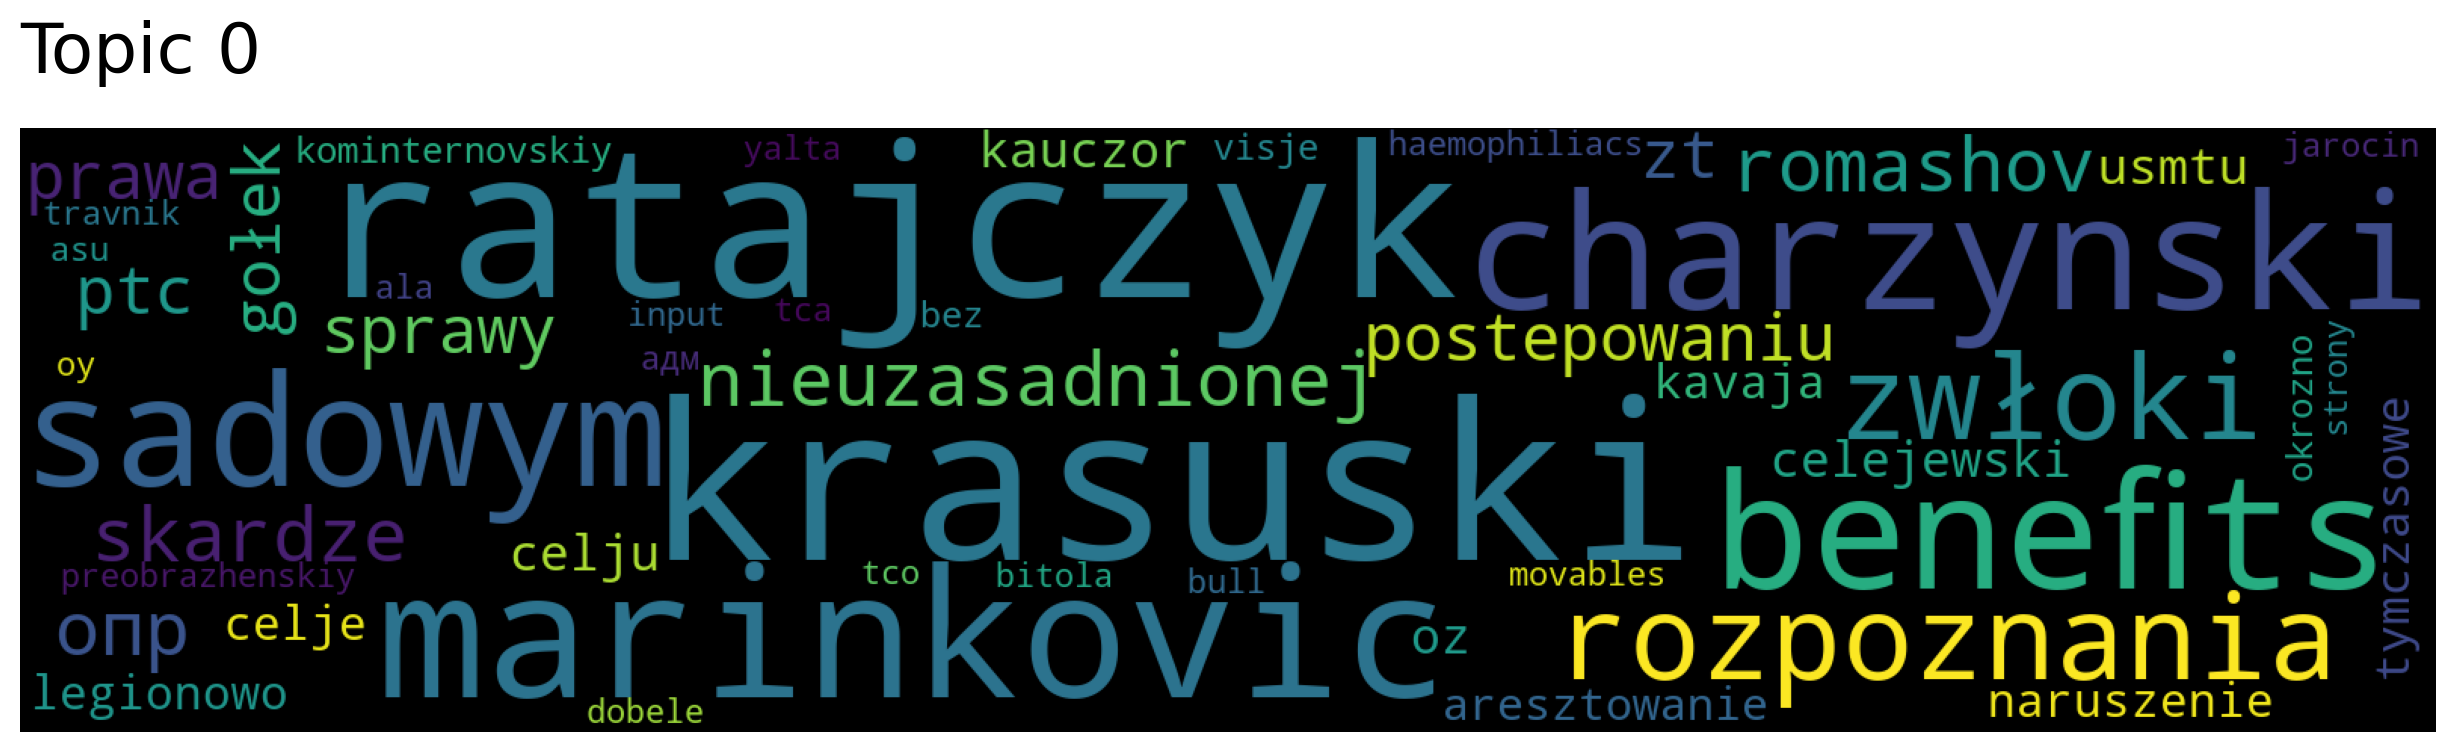

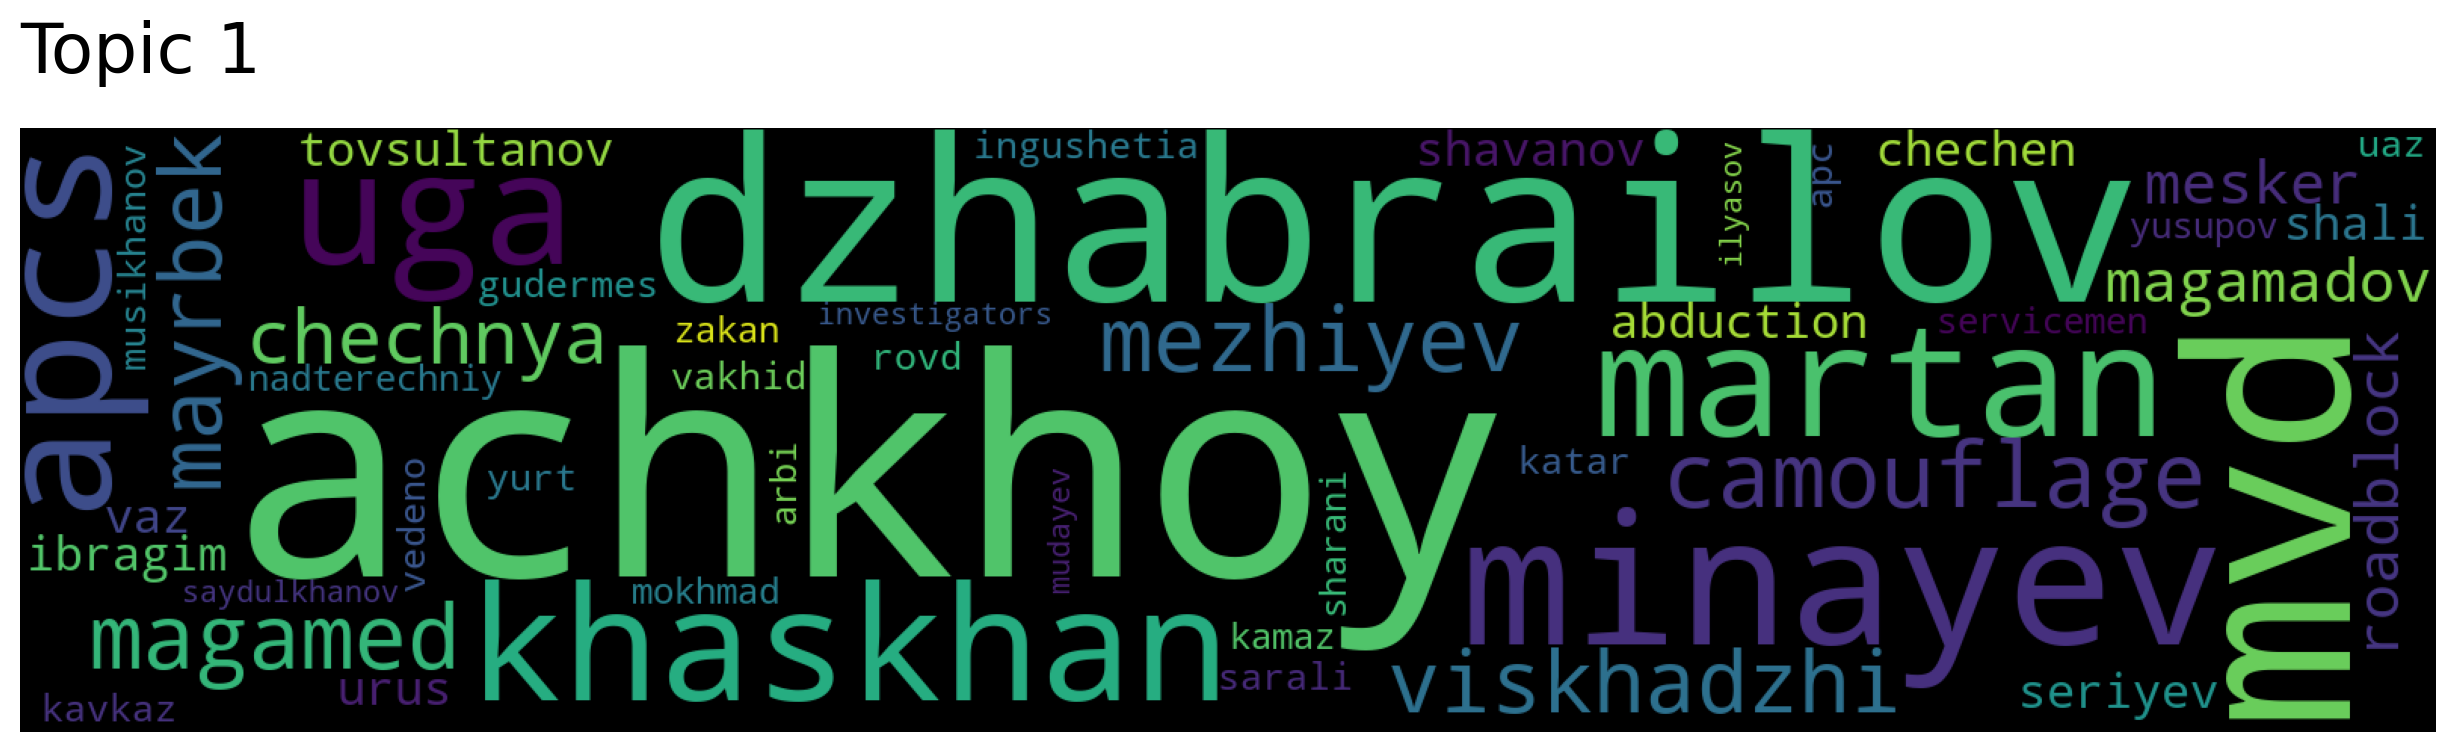

In [5]:
# 3.3 
# Visualizes the clusters/topics with top2vec's word cloud function, one word cloud per topic
topic_words, word_scores, topic_nums = model.get_topics()
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [6]:
'''3.4 
*Introdouction*
An interesting problem relevant to the legal sector is predicting how the legal landscape will change, finding potential changes in the law, biases in the legal system, and how the legal system is being used, among other benefits. 

The goal of this exercise is to find the trendline for the ratio of violations vs nonviolations for an article accross years, which could give an indication of changes in both how the court i used, and how the court itself rules, useful for finding anomalies which can be further researched, among other benefits.

The data provided in task 0 is similar to the case data used in previous assignments. In the 'Article 6 conclusion' column, 1 means there has been av violation, and -1 means there has been a non-violation.

The DataFrame methods groupby, rename, join and count, are not mentioned in this subject's github pages, but namedropped in their relevant tasks, and possible understand by reading the pandas documentation and searching the web for inspiration and further understadning. 

The exercise could be adapted to use the same data as previous assignements, giving it a higher difficulty and/or a larger task 0. 

*The exercise*
0. Add the following code:

import pandas
selection = pandas.DataFrame(
    [[-1, 1999],
    [-1, 1999],
    [1, 1999],
    [1, 1999],
    [1, 1999],
    [1, 2000],
    [-1, 2000]],
    index=['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7'],
    columns=['Article 6 conclusion', 'Year']
)

1. Using the selection, create a table containing only the rows which have a violation

2. Rename the column 'Article 6 conclusion' to 'Article 6 violations'
    - pandas dataframes have a method for renaming columns
    
3. Count the number of violations per year, resulting in a table where the index is the years, and the column has the number of violations
    - to do this, you could use the pandas methods groupby and count
    
4. Do the equivalent of task 1-3 for non-violations
    - this means that for example when task 1 says "... only the rows which have violations", you now instead do "... only the rows which have non-violations"

5. Join the two tables you have created, the one for violations and the one for non-violations, resulting in a table with year as index, and two columns 'Article 6 violations' and 'Article 6 non-violations'
    - pandas has a method for joining tables
    
6. Create a new column 'Ratio' containing the ratio of violations vs. non-violations ( ratio = violations / non-violations )
    - for example, if there are 3 violations, and 2 non-violations, the ratio should be 1,5
    - there is a pandas method "apply", which you can use for applying a function along an axis of a table
        - using apply, you can either use a lambda function, or you can use a function you have defined earlier in the code (which shows how lambda functions can be useful)

7. Print the complete table, and plot the ratio in a line chart
    - you wont get extra credits for making the chart look pretty, but it could be a nice learning experience'''


'3.4 \n*Introdouction*\nAn interesting problem relevant to the legal sector is predicting how the legal landscape will change, finding potential changes in the law, biases in the legal system, and how the legal system is being used, among other benefits. \n\nThe goal of this exercise is to find the trendline for the ratio of violations vs nonviolations for an article accross years.\n\nThe data provided in task 0 is similar to the case data used in previous assignments. In the \'Article 6 conclusion\' column, 1 means there has been av violation, and -1 means there has been a non-violation.\n\nThe DataFrame methods groupby, rename, join and count, are not mentioned in this subject\'s github pages, but namedropped in their relevant tasks, and possible understand by reading the pandas documentation and searching the web for inspiration and further understadning. \n\n*The exercise*\n0. Add the following code:\n\nimport pandas\nselection = pandas.DataFrame(\n    [[-1, 1999],\n    [-1, 1999],

      Article 6 violations  Article 6 non-violations  Ratio
Year                                                       
1999                     3                         2    1.5
2000                     1                         1    1.0


<AxesSubplot:xlabel='Year'>

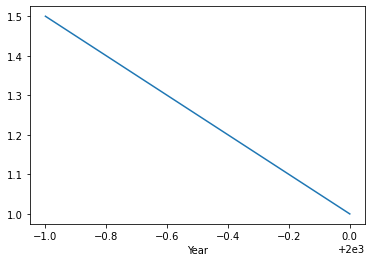

In [7]:
# 3.5 
# An answer to what was created in 3.4

'''Task 3.5 Make a solution for your exercise (5 points)
Make a solution for the exercise you made in the previous task.

This task will be graded based on these factors:

how well written/readable the solution is
how hard the problem is
how well the solution works'''

# 3.5.0
import pandas
selection = pandas.DataFrame(
    [[-1, 1999],
    [-1, 1999],
    [1, 1999],
    [1, 1999],
    [1, 1999],
    [1, 2000],
    [-1, 2000]],
    index=['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7'],
    columns=['Article 6 conclusion', 'Year']
)

# 3.5.1 Creates a table for only rows with a violation
violations_selection = selection.loc[selection['Article 6 conclusion'] == 1]

# 3.5.2 Renames the column 'Article 6 conclusion' to 'Article 6 violations'
violations_selection = violations_selection.rename(columns={'Article 6 conclusion': 'Article 6 violations'})

# 3.5.3 Counts the number of violations per year
violations_selection = violations_selection.groupby('Year').count()

# 3.5.4 Does the equivalent for non-violations
non_violations_selection = selection.loc[selection['Article 6 conclusion'] == -1]
non_violations_selection = non_violations_selection.rename(columns={'Article 6 conclusion': 'Article 6 non-violations'})
non_violations_selection = non_violations_selection.groupby('Year').count()

# 3.5.5 Joins the violations and non-violations tables
new_table = violations_selection.join(non_violations_selection)

# 3.5.6 Creates a new column 'Ratio' containing the ratio of violations vs. non-violations (ratio = violations / non-violations)
new_table['Ratio'] = new_table.apply(lambda row: row['Article 6 violations'] / row['Article 6 non-violations'], axis='columns')

# 3.5.7 Prints the table and plots the ratio in a line chart
print(new_table)
new_table['Ratio'].plot(kind='line')
